# here i have a credit card data in which i have time of transcation , amount and 28 unkown feature with class 0 -1(fraud or not fraud)
# importing librabies to perform model

In [1]:
import numpy as np #importing libraries
import pandas as pd
import matplotlib.pyplot as plt #ploting graph that discribe accuracy on differnt lamda values
from sklearn.model_selection import train_test_split # importing train test splting method
from sklearn.preprocessing import StandardScaler# scaling our datasets 
from sklearn.linear_model import LogisticRegression # imporying logistic regression
from sklearn.metrics import accuracy_score # importing accuracy score
from sklearn.metrics import confusion_matrix #importingconfusion matrix for better perfromance
from sklearn.metrics import classification_report #finfing precision , recall and f1 score=2*((precision*recall)/(precision+recall))
import seaborn as sns # importing seaborn lib

#  loading data and displaying first 7 rows

In [2]:
data=pd.read_csv("creditcard.csv") #import file 
data.head(7) #read 7 rows

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0


# getting data info , checking its types , number of values

In [3]:
data.info() #getting data types 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

# seeing the distibution of data 

In [4]:
data.describe() #getting some basci info about the data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
data.isna().values.any() #checking null values

False

# cloumn name is our data set in list

In [6]:
print(data.columns) #getting columns names 

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


# max amount of transaction

In [7]:
data["Amount"].max() #getting the max amount of fraud

25691.16

# min amount of transcation

In [8]:
data["Amount"].min() # getting the min amount of fraud

0.0

# counting no of class in target feature and counting it (0----1)

In [9]:
a=pd.value_counts(data["Class"],sort=True) #counting no of true or false value in class feature
a

0    284315
1       492
Name: Class, dtype: int64

# storing all fraud data (i.e 1) in fraud variable

In [10]:
fraud=data[data["Class"]==1] #getting fraud data from main data and storing in another dataframe
fraud

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


# storing non-fraud data (i.e 0) and notfraud variable

In [11]:
notfraud=data[data["Class"]==0] #getting non-fraud data from main data and storing in another dataframe i.e notfraud
notfraud

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [12]:
fraud.shape # shape of fraud data 

(492, 31)

In [13]:
notfraud.shape #shape of not frauid data

(284315, 31)

# plotting graph no if id's vs 0-1 ----------> number of fraud or non fraud cases with respect to number of user 

Text(0, 0.5, "no's od ids")

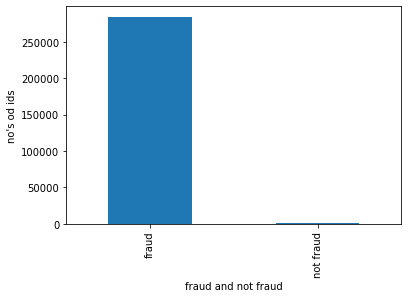

In [14]:
a.plot(kind="bar") #creating a bar graph for 0 and 1  
LABELS=["fraud","not fraud"] 
plt.xticks(range(2), LABELS)
plt.xlabel("fraud and not fraud")
plt.ylabel("no's od ids")

In [15]:
fraud.Amount.describe() #fraud data descibe

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [16]:
notfraud.Amount.describe() # non fraud data descibe

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

# creating histogram where bins are 50, in which its showing the amount of transcation with respect of no of transaction for fraud data

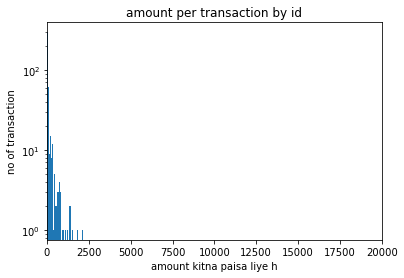

In [17]:
plt.hist(fraud.Amount,bins=50) #creating histo graph , reprsenting how much fraud is done by each id 
plt.xlabel("amount kitna paisa liye h")
plt.ylabel("no of transaction")
plt.xlim((0, 20000))
plt.yscale("log")
plt.title("amount per transaction by id")
plt.show()

# creating histogram where bins are 50, in which its showing the amount of transcation with respect of no of transaction for not-fraud data

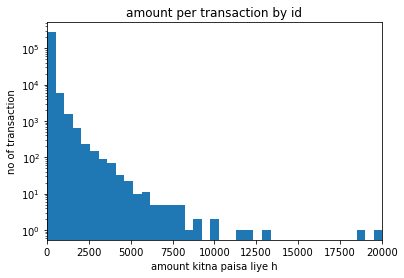

In [18]:
plt.hist(notfraud.Amount,bins=50) #creating histo graph , reprsenting how much fraud is done by each id 
plt.xlabel("amount kitna paisa liye h")
plt.ylabel("no of transaction")
plt.xlim((0, 20000))
plt.yscale("log")
plt.title("amount per transaction by id")
plt.show()

# creating scatter plot which shows how much time(seconds) required by each id to do transaction in fraud data

Text(0, 0.5, 'Amount')

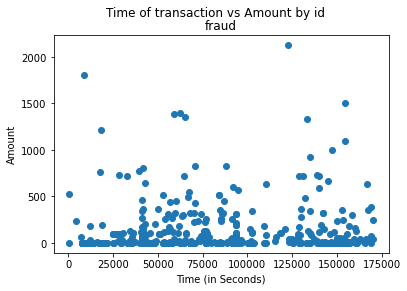

In [19]:
plt.scatter(fraud.Time,fraud.Amount) #creating scatter plot, # represting how much time is taken by each id for transaction
plt.xlabel("time in second for trans")
plt.ylabel("Amount /paisa kitna liya h")
plt.title("fraud")
plt.suptitle("Time of transaction vs Amount by id")
plt.xlabel("Time (in Seconds)")
plt.ylabel('Amount')

# creating scatter plot which shows how much time(seconds) required by each id to do transaction in not-fraud data

Text(0, 0.5, 'Amount')

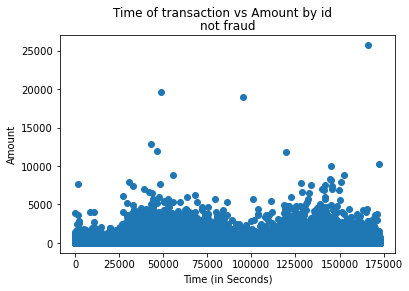

In [20]:
plt.scatter(notfraud.Time,notfraud.Amount) #creating scatter plot, # represting how much time is taken by each id for transaction
plt.xlabel("Time in second for trans")
plt.ylabel("Amount/paisa kitna liye h ")
plt.title("not fraud")
plt.suptitle("Time of transaction vs Amount by id")
plt.xlabel("Time (in Seconds)")
plt.ylabel("Amount")

# creatingh seaborn plot to check the score of v1----------v28 features

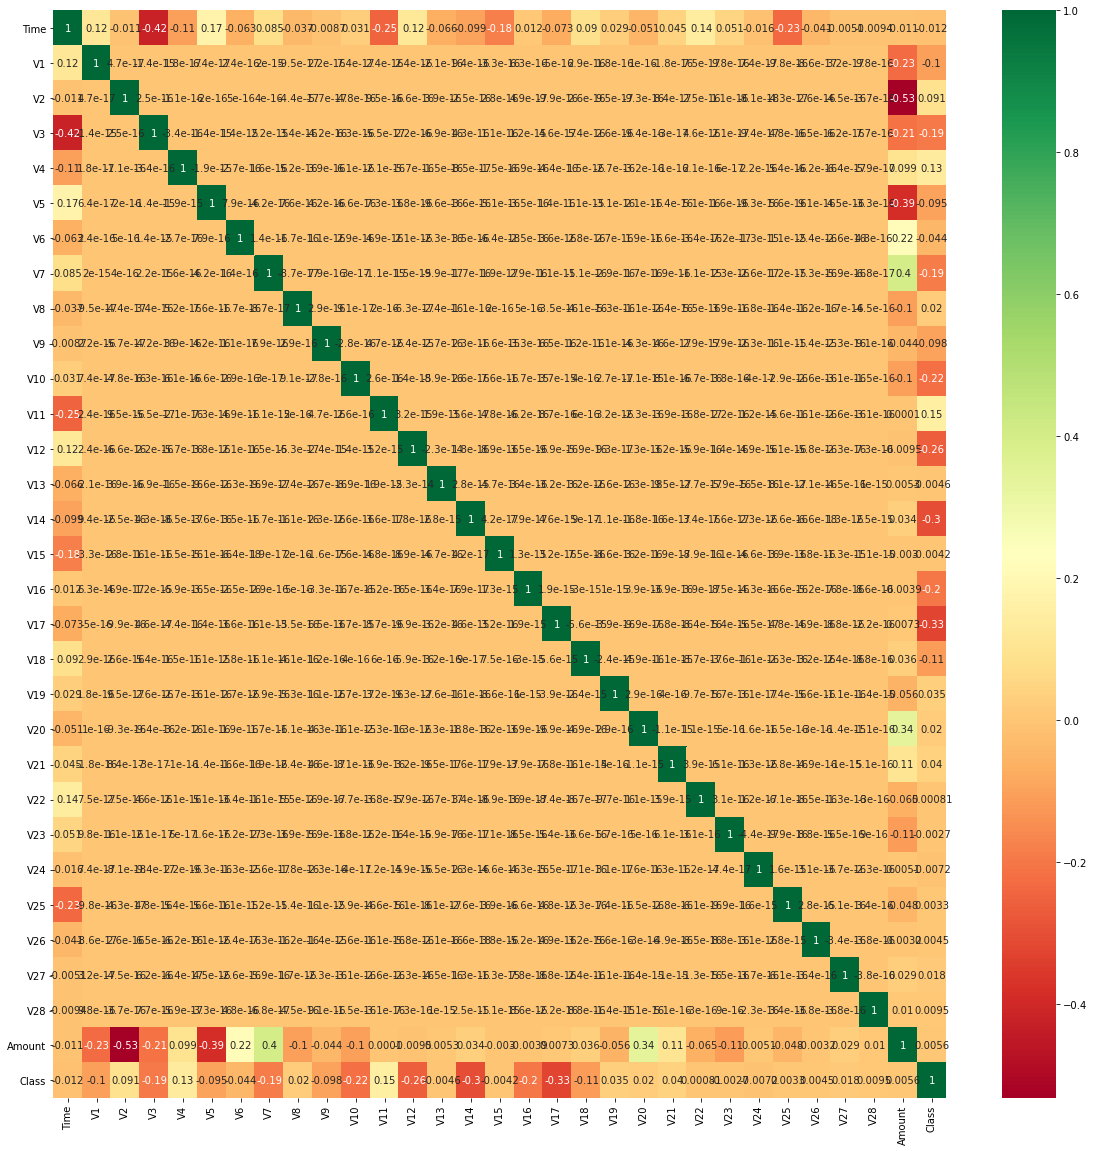

In [21]:

corrmat = data.corr() #getting corealtion btw each features
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [22]:
columns = data.columns.tolist() # list of all column
print(columns)

['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']


In [23]:
columns = [c for c in columns if c not in ["Class"]]  
print(columns)

['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']


In [24]:
target = "Class"

In [25]:
x= data[columns] # dividing feature )dependent or independent)
y= data[target]

In [26]:
print(x.shape) # shape of dependent or independent feature
print(y.shape)

(284807, 30)
(284807,)


# dividing whole data into three  parts test,train, validation data
# train 80 test 20
# train 80 of 80 and cv 20 of 80

In [27]:


x_1, x_test, y_1, y_test = train_test_split(x,y,test_size=0.2,random_state=42) # train =80 test =20
x_train, x_cv, y_train, y_cv = train_test_split(x_1,y_1,test_size= 0.2, random_state=42) #train = 80 % of 80 and crossvalidation=20% of 20

print("x_train shape: ",x_train.shape, "y_train shape: ",y_train.shape)#size of train ##for traing
print("x_cv shape: ",x_cv.shape, "y_cv shape: ",y_cv.shape)#size of crossvalidation ##fro better accuracy
print("x_test shape: ",x_test.shape, "y_test shape: ",y_test.shape)# size of test ##fro prediction

x_train shape:  (182276, 30) y_train shape:  (182276,)
x_cv shape:  (45569, 30) y_cv shape:  (45569,)
x_test shape:  (56962, 30) y_test shape:  (56962,)


# changing our data into normaloze from using standard scales

In [28]:
sc = StandardScaler()

x_trainS = sc.fit_transform(x_train)
X_1S = sc.fit_transform(x_1)
x_cvS = sc.transform(x_cv)

x_testS = sc.transform(x_test)


In [29]:
x_trainS # changed train data

array([[ 1.48271817, -1.53279477,  1.93575792, ...,  1.53042983,
         1.37690082, -0.34530866],
       [ 0.7244347 ,  1.06712294, -0.5362488 , ..., -0.17322774,
        -0.35794798, -0.1591601 ],
       [-1.02570942,  0.41299182, -0.35371594, ..., -0.06658436,
         0.07317873,  0.56040677],
       ...,
       [-0.88662024, -0.53907354,  0.58896511, ...,  0.75823385,
         0.34901823, -0.24981047],
       [ 1.11274726,  1.0579916 , -0.07787372, ..., -0.18494625,
        -0.23905674, -0.31291101],
       [ 0.25713295,  0.02776982,  0.62046433, ...,  0.55980185,
         0.27711674, -0.34128852]])

In [30]:
x_testS #changed test data

array([[-1.122118  , -8.43953559,  5.18252006, ..., -5.02350367,
        -3.16294175,  1.0815138 ],
       [-1.06408273,  0.1730534 , -1.65602032, ...,  0.10210496,
         0.30863538,  1.69317258],
       [-1.24890694,  0.71421679, -0.35634288, ...,  0.02847206,
         0.013272  , -0.22547388],
       ...,
       [ 1.00442384,  0.02018331, -0.06601034, ...,  0.89063984,
         1.0738269 , -0.31714621],
       [-0.75040591, -0.25325795,  0.59873588, ...,  0.10094377,
        -0.81883767, -0.33299371],
       [-0.96715373, -0.81263064,  0.59930001, ...,  0.31303049,
        -1.8421089 ,  3.2080607 ]])

In [31]:
x_cvS # changed c.v data

array([[-0.53749061,  0.60547519,  0.10549225, ...,  0.09502493,
         0.03581771, -0.28764788],
       [-0.53081529,  0.68281032, -0.15847157, ..., -0.20198109,
        -0.00641595, -0.30784953],
       [-1.72399171, -0.39425477,  0.84375988, ...,  0.65371967,
        -0.04716569, -0.31192908],
       ...,
       [-0.38882262, -1.17381328,  0.14467813, ...,  0.1015596 ,
        -0.33230442, -0.21150925],
       [-0.9950553 ,  0.57534025, -0.28359542, ...,  0.296841  ,
         0.13853221, -0.26866226],
       [-0.36146856, -0.56842152,  0.1264932 , ...,  0.52380908,
        -0.22683981, -0.26705397]])

# fitting losgistic regression , because we have classifie into binary (0--1) 

In [32]:

alpha = [10**x for x in range(-4,4,1)] # creating lamd value 
acc = [] #storing accuracy
for c in alpha: # running loop for different lambda value to check at which point accuracy is high
  clf = LogisticRegression(penalty='l2',tol=0.0001, C=c,max_iter=1000)
  clf.fit(x_trainS,y_train)
  y_pred = clf.predict(x_cvS)
  score = accuracy_score(y_pred,y_cv)
  acc.append(score) # appendingscore in list 
  print(score)

0.9987272048980667
0.9991660997608023
0.9992758234764862
0.9992758234764862
0.9992538787333495
0.9992538787333495
0.9992538787333495
0.9992538787333495


# plotting graph for increase in accuracy with respect to alpha value

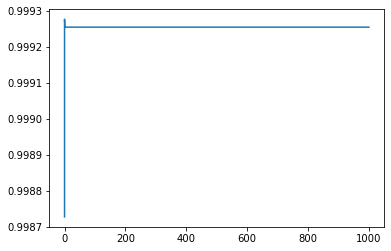

In [33]:

plt.plot(alpha,acc)

In [34]:
optimalC = alpha[acc.index(max(acc))]# obtaing at which point accuracy is high
print(optimalC)

0.01


# finding accuracy score 

In [35]:
clf = LogisticRegression(penalty='l2',tol=0.0001, C=optimalC,max_iter=1000) # again creating and fitting our model at lamda value =1 ie c=1
clf.fit(x_trainS,y_train)
y_pred = clf.predict(x_testS)
score = accuracy_score(y_pred,y_test)
print(score)

0.9990344440153085


# confusion matix

In [36]:

confusion_matrix(y_pred,y_test) # so here 76 and 36 points truely classified

array([[56855,    46],
       [    9,    52]], dtype=int64)

# precision and recall

In [37]:

print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56901
           1       0.53      0.85      0.65        61

    accuracy                           1.00     56962
   macro avg       0.77      0.93      0.83     56962
weighted avg       1.00      1.00      1.00     56962



# finding score after putting test data

In [38]:
clf = LogisticRegression(penalty='l2',tol=0.0001, C=optimalC,max_iter=1000) # again creating and fitting our model at lamda value =1 ie c=1
clf.fit(x_trainS,y_train)
y_pred = clf.predict(x_testS)
score = accuracy_score(y_pred,y_test)
print(score)

0.9990344440153085
